We will refresh the concepts of sampling distributions and interval estimate in this notebook.
First we select random samples from a finite population, and then use the samples to estimate population parameters.
1. Selecting a Sample
2. Sample Distribution
3. Compare Sample to Population
4. Sampling Error
5. Interval Estimation for a Population Mean


## Selecting a Sample

We use the [NBA Players dataset](https://www.kaggle.com/drgilermo/nba-players-stats) to select a sample of players' weight.

In [1]:
import random
import os
import math
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
project_dir = '/mnt/data-ubuntu/Projects/statistics_python3'
df = pd.read_csv(project_dir + '/data/nba-players-stats/player_data.csv')

In [3]:
df = df.loc[:, ['name', 'birth_date', 'weight']].drop_duplicates()
df.head()

,name,birth_date,weight
0,Alaa Abdelnaby,"June 24, 1968",240.0
1,Zaid Abdul-Aziz,"April 7, 1946",235.0
2,Kareem Abdul-Jabbar,"April 16, 1947",225.0
3,Mahmoud Abdul-Rauf,"March 9, 1969",162.0
4,Tariq Abdul-Wahad,"November 3, 1974",223.0


In [4]:
len_sample = int(df.name.count()/100)
print(f'There are {df.name.count()} players, we will take a sample of {len_sample}.')

There are 4550 players, we will take a sample of 45.


In [5]:
weight_sample = random.sample(df.weight.tolist(), len_sample)
weight_sample

[190.0,
 215.0,
 185.0,
 225.0,
 240.0,
 205.0,
 251.0,
 210.0,
 185.0,
 198.0,
 190.0,
 175.0,
 210.0,
 220.0,
 245.0,
 195.0,
 185.0,
 240.0,
 190.0,
 175.0,
 220.0,
 185.0,
 175.0,
 190.0,
 180.0,
 208.0,
 170.0,
 237.0,
 220.0,
 193.0,
 188.0,
 196.0,
 253.0,
 185.0,
 200.0,
 240.0,
 220.0,
 195.0,
 212.0,
 215.0,
 215.0,
 225.0,
 215.0,
 190.0,
 155.0]

## Sample Distribution

We've selected a sample, let's calculate the sample mean, standard deviation and plot the distribution of the sample.

In [6]:
## Sample mean
s_mean = np.mean(weight_sample)
## Sample std
s_std = np.std(weight_sample, ddof = 1)
print(f'The sample mean is {s_mean:.2f}, and the sample standard deviation is {s_std:.2f}.')

The sample mean is 204.69, and the sample standard deviation is 23.30.


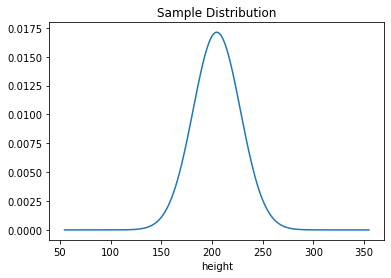

In [7]:
# Plot the sample distribution
x = np.linspace(s_mean-150, s_mean+150, 300)
plt.plot(x, stats.norm.pdf(x, s_mean, s_std))
plt.xlabel('height')
plt.title('Sample Distribution')
plt.show()

## Compare Sample to Population

In [8]:
# Population mean
p_mean = np.mean(df.weight)
# Population std
p_std = np.std(df.weight)
print(f'The population mean is {p_mean:.2f}, and the standard deviation is {p_std:.2f}.')

The population mean is 208.91, and the standard deviation is 26.27.


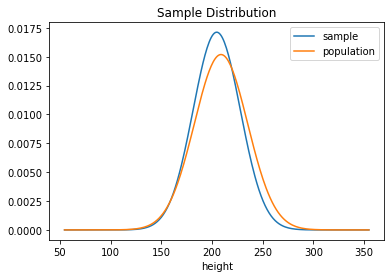

In [9]:
# Plot the sample and population distribution.

x = np.linspace(s_mean-150, s_mean+150, 300)
plt.plot(x, stats.norm.pdf(x, s_mean, s_std), label = 'sample')
plt.plot(x, stats.norm.pdf(x, p_mean, p_std), label = 'population')
plt.xlabel('height')
plt.title('Sample Distribution')
plt.legend()
plt.show()

## Sampling Error

1. Sampling error: the random collection of sample data does not ensure that any single sample will be perfectly representative of the population of interest; when collecting a sample randomly, the data in the sample cannot be expected to be perfectly representative of the population from which it has been taken. Sampling error is unavoidable when collecting a random sample; this is a risk we must accept when we chose to collect a random sample rather than incur the costs associated with taking a census of the population.
2. Non-sampling error:
    * Coverage error
    * Nonresponse error
    * Measurement error

## Interval Estimation for a Population Mean

If the population standard deviation is unknown, we need to use the sample standard deviation to estimate it.

In [11]:
sig_levels = [.9, .95, .99]
for sl in sig_levels:
    sig_l = stats.t.interval(sl,
                             len_sample-1, 
                             loc=np.mean(weight_sample), 
                             scale=stats.sem(weight_sample))
    print(f'For a significance level {sl}, the interval is between {sig_l[0]:.2f} and {sig_l[1]:.2f}.')

For a significance level 0.9, the interval is between 198.85 and 210.52.
For a significance level 0.95, the interval is between 197.69 and 211.69.
For a significance level 0.99, the interval is between 195.34 and 214.04.


## Determining the Sample Size

We will learn how to choose a sample size large enough to provide a desired margin
of error.

In [23]:
# If we set the desired margin of error = 5,
# and the 95% level of confidence indicates z = 1.96.
n = (1.96**2 * s_std**2)/5**2
print(f'If we set a desired margin of error = 5, and a 95% level of confidence, the sample size should be {int(n)}.')

If we set a desired margin of error = 5, and a 95% level of confidence, the sample size should be 83.
